In [15]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [16]:
%%bash
cd .. && make clean && make

In [35]:
config_name = 'constant'
conf = load_conf(config_name)
final_temp_th = (lambda r: conf['S0'] / (4 * conf['kappa0']) * (conf['R']**2 - r**2) + conf['TR'])(0)

In [21]:
N = np.linspace(10, 1000, 200, dtype=int)
data_unif = run_with_params(
    config_name,
    gen_variations({
        'alpha': [1],
        'N': N
    })
)
data_nonunif = run_with_params(
    config_name,
    gen_variations({
        'alpha': [2],
        'N': N
    })
)

Running simulations... Done 200/200
Running simulations... Done 200/200


# Plots!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


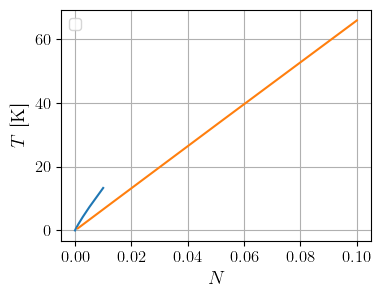

In [41]:
error_final_temp_unif = np.zeros(len(N))
error_final_temp_nonunif = np.zeros(len(N))
for i, (params, temp, heat) in enumerate(data_unif):
    error_final_temp_unif[i] = abs(temp[0,1] - final_temp_th)

for i, (params, temp, heat) in enumerate(data_nonunif):
    error_final_temp_nonunif[i] = abs(temp[0,1] - final_temp_th)

plt.plot(1/N**2, error_final_temp_unif)
plt.plot(1/N, error_final_temp_nonunif)

plt.xlabel(r'$N$')
plt.ylabel(r'$T$ [K]')
plt.legend()
plt.grid()

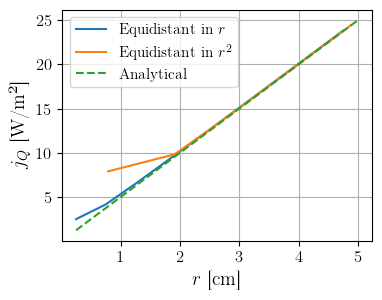

In [8]:
plt.plot(data_unif_heat[:,0]*100, data_unif_heat[:,1], label='Equidistant in $r$')
plt.plot(data_nonunif_heat[:,0]*100, data_nonunif_heat[:,1], label='Equidistant in $r^2$')
# TODO: solution analytique
x = np.linspace(data_unif_heat[0,0], conf['R'], 10)
y = conf['S0'] / 2 * x
plt.plot(x*100, y, '--', label='Analytical')

plt.xlabel(r'$r$ [cm]')
plt.ylabel(r'$j_Q$ [W/m²]')
plt.legend()
plt.grid()

## Balance de puissance globale

In [9]:
def s(r):
    return conf['S0'] * np.exp(-(r - conf['r0'])**2 / (conf['sigma']**2))

In [10]:
gamma_Q = 2 * np.pi * conf['R'] * data_unif_heat[-1,1]
Ptot = np.trapz(2 * np.pi * s(data_unif_heat[:,0]) * data_unif_heat[:,0], data_unif_heat[:,0])

print(gamma_Q, Ptot)

7.481950924996742 7.068583470577034
